In [1]:
import numpy as np
import pandas as pd

In [2]:
queen_train_path = "../feature_extraction/MFCCs_80_features/train/train_queen.npy"
queenless_train_path = "../feature_extraction/MFCCs_80_features/train/train_queenless.npy"
queen_test_path = "../feature_extraction/MFCCs_80_features/test/train_queen.npy"
queenless_test_path = "../feature_extraction/MFCCs_80_features/test/train_queenless.npy"
queen_val_path = "../feature_extraction/MFCCs_80_features/val/train_queen.npy"
queenless_val_path = "../feature_extraction/MFCCs_80_features/val/train_queenless.npy"

In [3]:
queen_train = np.load(queen_train_path)
queenless_train = np.load(queenless_train_path)
queen_test = np.load(queen_test_path)
queenless_test = np.load(queenless_test_path)
queen_val = np.load(queen_val_path)
queenless_val = np.load(queenless_val_path)


In [4]:
train_label = pd.DataFrame(np.hstack([[0]*7000, [1]*7000]).T, columns=['labels'])


In [5]:
train_data = pd.DataFrame(np.vstack([queen_train, queenless_train]))



In [6]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-531.931335,136.621933,45.603500,19.686640,6.475194,6.768497,-0.932306,6.658151,3.660365,2.098238,...,3.410441,3.068254,3.461446,2.733752,2.617498,2.545141,3.265490,2.939814,3.251054,2.363111
1,-536.993347,138.456238,34.898472,20.860229,4.066461,3.119111,-2.870780,0.477826,3.070781,0.220865,...,3.271066,3.057924,2.934288,2.283246,2.528649,3.761013,3.405852,3.222660,2.804340,2.501446
2,-525.730591,136.192719,36.625347,23.067327,0.258045,4.746896,-0.178224,2.476325,7.398917,3.634185,...,2.569722,2.521067,2.660564,3.227906,2.621328,2.251341,2.990477,3.052036,2.337557,3.078192
3,-540.449829,139.705780,29.665409,21.128056,3.132750,0.994988,0.255035,-0.820775,1.864982,0.350622,...,3.424932,2.889518,2.459073,2.296302,2.437574,3.083648,2.754676,2.309684,2.791369,2.983374
4,-543.696594,144.002136,36.112610,24.168007,2.962288,3.031038,-5.003596,1.735093,2.667939,1.482007,...,2.344167,3.222942,2.953240,2.791287,2.718980,2.942434,2.700898,2.942176,2.915053,2.179448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,-586.455139,137.282516,34.373566,17.421253,10.941988,4.078198,11.242457,5.941251,6.012725,8.022065,...,2.428052,2.559160,2.407419,3.277859,2.843850,2.667268,2.398551,2.329866,2.560516,2.335296
13996,-572.707092,143.127991,32.171494,18.097290,9.731588,5.532512,8.742662,3.005665,5.201865,7.527236,...,2.768167,2.137187,3.072467,2.713317,2.586028,3.205523,3.542013,2.731712,2.763573,2.462618
13997,-579.057922,134.726349,32.156475,19.218019,5.755665,3.477601,12.935046,6.404186,5.639282,6.843115,...,2.286288,3.401324,2.976722,2.437173,2.736468,2.637976,2.689160,2.406368,2.608299,2.571860
13998,-578.548889,141.396133,31.506187,20.068113,6.832242,3.192559,11.349093,4.352320,4.009240,5.281808,...,2.726443,2.538073,2.842417,2.398781,3.491852,2.933051,2.796699,2.359412,2.553164,2.986884


In [7]:
queenless_test.shape

(2000, 80)

In [8]:
test_label = pd.DataFrame(np.hstack([[0]*3000, [1]*3000]).T, columns=['labels'])
test_data = pd.DataFrame(np.vstack([queen_test, queen_val, queenless_test, queenless_val]))



In [9]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data)

In [11]:
X_test_scaled = scaler.transform(test_data)

In [12]:
X_scaled

array([[-0.20656753, -1.05254159,  1.80653149, ...,  0.70874456,
         1.59604135, -0.75493088],
       [-0.28666657, -0.89583887,  0.62970205, ...,  1.44871751,
         0.40047672, -0.38207314],
       [-0.10844967, -1.08920894,  0.81954159, ...,  1.00233595,
        -0.84879803,  1.17243335],
       ...,
       [-0.95227791, -1.21447935,  0.32826777, ..., -0.686837  ,
        -0.12419878, -0.19228823],
       [-0.94422319, -0.64468669,  0.25678009, ..., -0.80968377,
        -0.27175752,  0.92632872],
       [-1.04496897, -1.09106518,  0.24471263, ...,  0.9151236 ,
         0.61586909, -0.1076647 ]])

In [13]:
import time
t1 = time.time()
clf = KNeighborsClassifier()

clf.fit(X_scaled, np.array(train_label).ravel())
t2 = time.time()

In [14]:
print(f"time elapsed: {t2-t1} seconds or {int((t2-t1)//60)} minutes and {int((t2-t1)-(t2-t1)//60*60)} seconds")

time elapsed: 0.0033521652221679688 seconds or 0 minutes and 0 seconds


In [15]:
print(accuracy_score(test_label,clf.predict(X_test_scaled)))

0.916


In [16]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay


In [17]:
print(classification_report(test_label,clf.predict(X_test_scaled), target_names=["Queen", "Queenless"]))

              precision    recall  f1-score   support

       Queen       0.89      0.95      0.92      3000
   Queenless       0.95      0.88      0.91      3000

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



In [18]:
roc_curve(test_label,clf.predict(X_test_scaled))

(array([0.        , 0.04566667, 1.        ]),
 array([0.        , 0.87766667, 1.        ]),
 array([2, 1, 0]))

In [19]:
import matplotlib.pyplot as plt

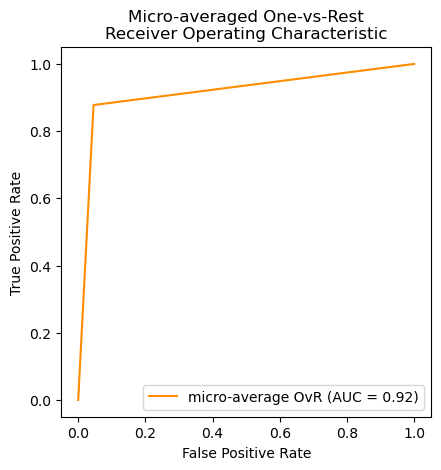

In [20]:
RocCurveDisplay.from_predictions(
    np.array(test_label.values).ravel(),
    np.array(clf.predict(X_test_scaled)).ravel(),
    name="micro-average OvR",
    color="darkorange",

)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

In [97]:
df_cm/df_cm.sum()

,Queen,Queenless
Queen,0.963725,0.017347
Queenless,0.036275,0.982653


<Axes: >

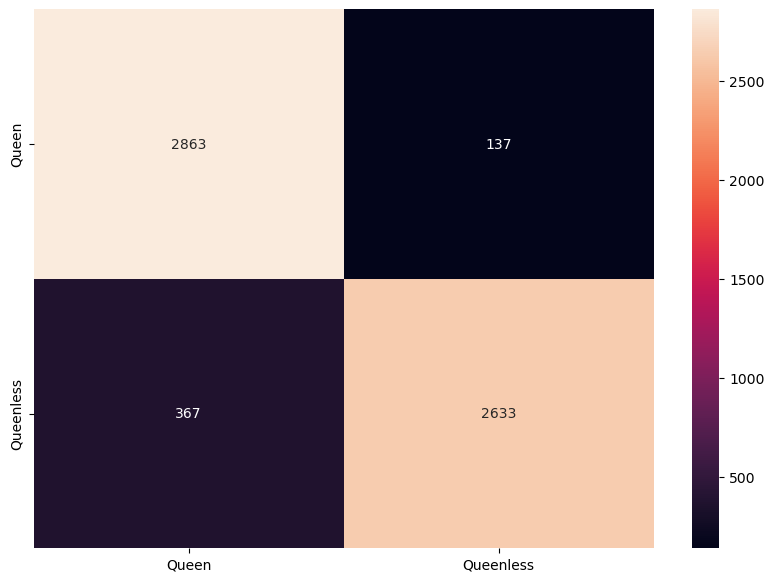

In [22]:
import seaborn as sns

cf_mat = confusion_matrix(test_label, clf.predict(X_test_scaled))
df_cm = pd.DataFrame(cf_mat, index = [i for i in ['Queen', 'Queenless']],
                  columns = [i for i in ['Queen', 'Queenless']])
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="", )


<Axes: >

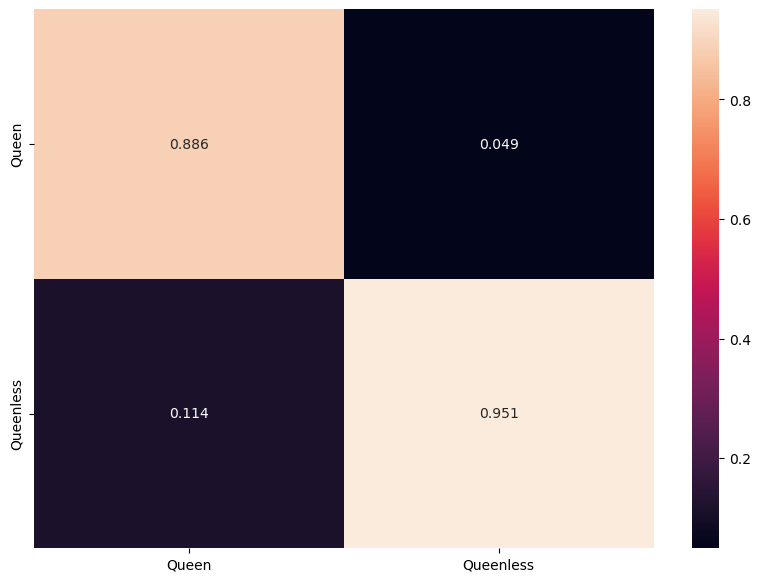

In [23]:
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_normed, annot=True, fmt=".3f", )